Let's analyze our data set performing EDA

Import the required libraries

In [541]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Print library versions to avoid conflicts

In [542]:
print(f'Pandas Version: {pd.__version__}') 
print(f'Numpy Version: {np.__version__}') 
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')

Pandas Version: 1.5.3
Numpy Version: 1.23.5
Matplotlib version: 3.6.3
Seaborn version: 0.12.2


Add some configurations

In [543]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.4f}'.format

np.set_printoptions(suppress = True)

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Load the train dataset

In [544]:
ds_titanic_train = pd.read_csv(r"C:\Users\Administrador\Documents\IA\Proyectos\Titanic\Datasets\train.csv", encoding = 'unicode_escape')
ds_work = ds_titanic_train.copy()

# Checking features, shape and correct load of the dataset

Show first 10 registers

In [545]:
ds_work.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


Show last 10 registers

In [546]:
ds_work.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q


Show 10 random registers

In [547]:
ds_work.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
681,682,1,1,"Hassab, Mr. Hammad",male,27.0000,0,0,PC 17572,76.7292,D49,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0000,0,1,11767,83.1583,C50,C
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0000,0,2,C.A. 31921,26.2500,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0000,0,0,A/5 3540,8.0500,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0000,0,0,347074,7.7750,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0000,1,0,STON/O2. 3101279,15.8500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0000,0,0,PC 17754,34.6542,A5,C
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0000,0,1,2691,14.4542,NaN,C
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)",female,17.0000,1,0,PC 17758,108.9000,C65,C


Features of the dataset

In [548]:
ds_work.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Shape of the dataset

In [549]:
ds_work.shape

(891, 12)

# Checking null values

Check how many null values there are per feature, and % of null values per feature

In [550]:
ds_work.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [551]:
ds_work.isnull().sum() * 100 / len(ds_work)

PassengerId    0.0000
Survived       0.0000
Pclass         0.0000
Name           0.0000
Sex            0.0000
Age           19.8653
SibSp          0.0000
Parch          0.0000
Ticket         0.0000
Fare           0.0000
Cabin         77.1044
Embarked       0.2245
dtype: float64

# Correlation between features

Check the correlation between features

<AxesSubplot: >

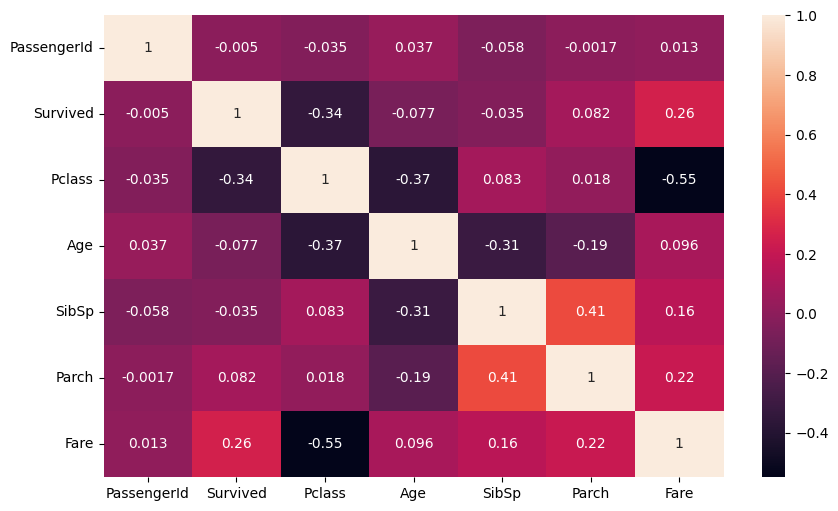

In [552]:
corr = ds_work.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True)

There seems to be a strong relationship between Pclass and Fare

# Check feature values

## Values frequency

Let's see the frequency for each value of each feature, but only for those features that are not unique nor take only numerical specific values (ID, name, Age and Fare)

In [553]:
ds_aux = ds_work.copy()
ds_aux.drop(['PassengerId', 'Name', 'Age', 'Fare', 'Ticket'], axis = 1, inplace = True)

for col in ds_aux.columns:
  print('variable:', col)
  print(ds_aux[col].value_counts(dropna=False).to_string())
  print('_________________________') 

variable: Survived
0    549
1    342
_________________________
variable: Pclass
3    491
1    216
2    184
_________________________
variable: Sex
male      577
female    314
_________________________
variable: SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
_________________________
variable: Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
_________________________
variable: Cabin
NaN                687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
D                    3
F33                  3
E101                 3
F2                   3
B20                  2
E67                  2
C125                 2
E24                  2
B49                  2
B77                  2
D35                  2
C78                  2
C93                  2
C65                  2
B57 B59 B63 B66      2
B5                   2
E121                 2
B51 B53 B55          2
B18                  2
C124                 

## Important values for categorical and numerical features

Let's separate features into categorical and numerical

In [554]:
categorical_cols = ds_work.select_dtypes(include = ['object']).columns.tolist()
numerical_cols = ds_work.select_dtypes(include = np.number).columns.tolist()
print("Categorical Variables:")
print(categorical_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Now, let's show some important values for numerical features

In [555]:
ds_work.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


And also for categorical features

In [556]:
ds_work.describe(exclude = [np.number, "category"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


This tells us varios things:
* Name and PassengerID values are unique (As expected), but Ticket values are not (Actually, there is a ticket that is repeated 7 times)
* There is at least one fare equal to 0, and another fare equal to 512
* Excluding all null values from Cabin, it has repeated values

## Fare Extreme Values

Let's check for both extreme values for the Fare feature

In [557]:
ds_work[ds_work['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0000,0,0,LINE,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0000,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0000,0,0,LINE,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0000,0,0,LINE,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0000,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S


In [558]:
ds_work[ds_work['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0000,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0000,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0000,0,0,PC 17755,512.3292,B101,C


There doesn't seem to be anything wrong

## Repeated Ticket Values

Now, let's check values for the feature Ticket. There doesn't seem to be 889 tickets but 680 (They are not unique), let's check the repeated values.

In [559]:
ds_work[ds_work.duplicated(['Ticket'], keep = False)].sort_values(by = "Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0000,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33.0000,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0000,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0000,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0000,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0000,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0000,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0000,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0000,0,1,111361,57.9792,B18,C


We could conclude that some repeated tickets come from members of certain families. It could also be that all people who shared a particular ticket either died or survived. Let's check if that is true, making a scatterplot with "Ticket" and "Survived" features to check if there is a visible relationship

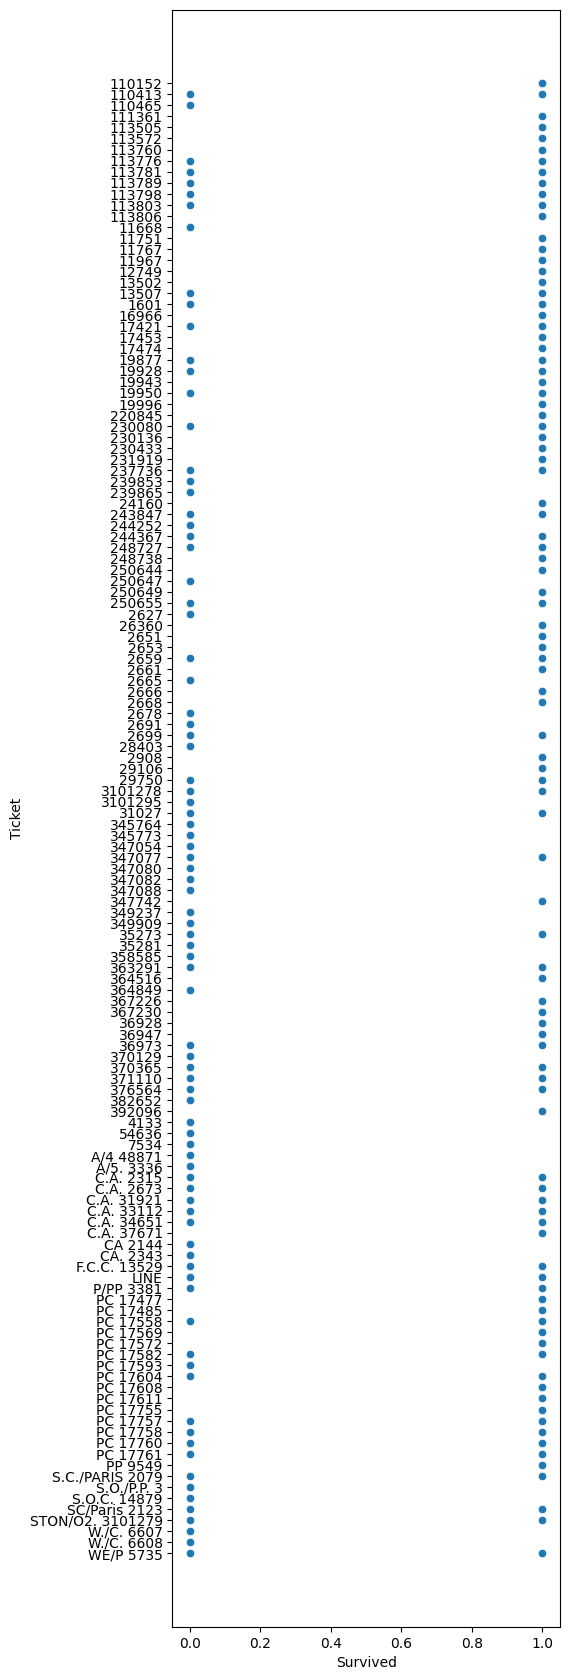

In [560]:
plt.figure(figsize = (5, 21))
sns.scatterplot(data = ds_work[ds_work.duplicated(['Ticket'], keep = False)].sort_values(by = "Ticket"), x = "Survived" , y = "Ticket")
plt.show()

This tells us that most people who shared a particular ticket died and some others survived. Therefore, it doesn't seem to be a relevant correlation between "Survived" and "Ticket", so we could eliminate the "Ticket" feature from out dataset.

## Repeated Cabin values

Now, let's look at all repeated values for the "Cabin" feature and how many passengers have repeated values for "Cabin"

In [561]:
ds_repeated_cabin = ds_work[ds_work.duplicated(['Cabin'], keep = False)].sort_values(by = "Ticket").dropna()
ds_repeated_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0000,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33.0000,0,0,110152,86.5000,B77,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0000,1,1,110413,79.6500,E67,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0000,1,1,110413,79.6500,E67,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0000,0,0,110564,26.5500,C52,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0000,0,1,111361,57.9792,B18,C
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0000,0,1,111361,57.9792,B18,C
331,332,0,1,"Partner, Mr. Austen",male,45.5000,0,0,113043,28.5000,C124,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0000,0,1,113505,55.0000,E33,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0000,1,2,113760,120.0000,B96 B98,S


In [562]:
ds_repeated_cabin.dropna().shape[0]

95

It seems like most people who shared Cabin, also shared Ticket. Let's check if that is true. 

In [563]:
ds_repeated_cabin_and_ticket = ds_work[ds_work.duplicated(['Cabin'], keep = False)][ds_work.duplicated(['Ticket'], keep = False)].sort_values(by = "Ticket").dropna()
ds_repeated_cabin_and_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33.0000,0,0,110152,86.5000,B77,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0000,0,0,110152,86.5000,B77,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0000,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0000,1,1,110413,79.6500,E67,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0000,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0000,0,1,111361,57.9792,B18,C
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0000,0,1,113505,55.0000,E33,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0000,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S


Let's also check how many people share both Ticket and Cabin

In [564]:
ds_repeated_cabin_and_ticket.dropna().shape[0]

76

So, out of 95 people who shared Cabin, 76 people (80%) also shared Ticket. Let's see whether people who shared a particular cabin and ticket, all died or all survived

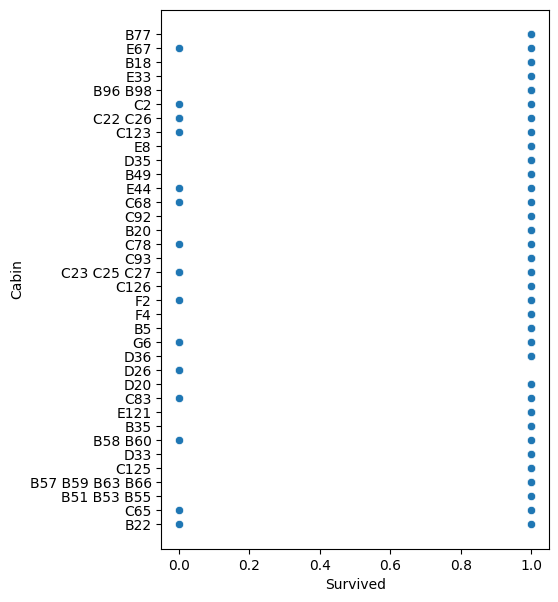

In [565]:
plt.figure(figsize = (5, 7))
sns.scatterplot(data = ds_repeated_cabin_and_ticket.dropna(), x = "Survived" , y = "Cabin")
plt.show()

So, unlike Ticket, most people who shared a Cabin and Ticket, either all died or all survived. In fact, it seems like most of them survived. However, Cabin has a 77% of null values, and these null values don't give us useful information. So, we could delete this feature.